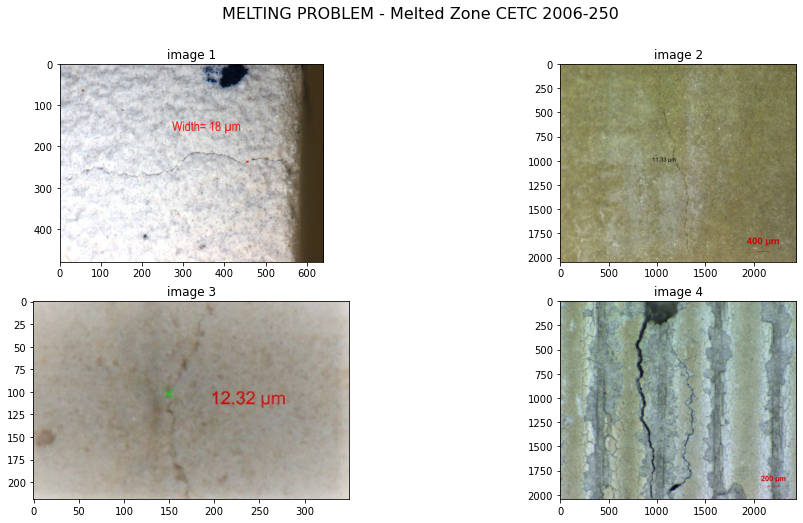

In [1]:
import matplotlib.pyplot as plt
img1 = plt.imread('//SPRC0FIL2001/ptadata$/Z Cleansed Axial Cracking Data - Emmanuel Oyekanlu Ongoing/img1.jpg')
img2 = plt.imread('//SPRC0FIL2001/ptadata$/Z Cleansed Axial Cracking Data - Emmanuel Oyekanlu Ongoing/img2.jpg')
img3 = plt.imread('//SPRC0FIL2001/ptadata$/Z Cleansed Axial Cracking Data - Emmanuel Oyekanlu Ongoing/img3.jpg')
img4 = plt.imread('//SPRC0FIL2001/ptadata$/Z Cleansed Axial Cracking Data - Emmanuel Oyekanlu Ongoing/img4.jpg')


images = [img1, img2, img3, img4]

NUM_ROWS = 2
IMGs_IN_ROW = 2

f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,8))

for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        ax.imshow(images[j*IMGs_IN_ROW+i])
        ax.set_title(f'image {j*IMGs_IN_ROW+i+1}')

title = 'MELTING PROBLEM - Melted Zone CETC 2006-250'
f.suptitle(title, fontsize=16)
plt.show()



In [2]:
# printing first five rows of the one-hot encode file
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#import PIL.Image
#import PIL.ImageTk
#C:/Users/oyekanlea2/Desktop/MultiImageClassification/MultiLabelDataset/Multi_Label_dataset/Multi_Label_dataset
train = pd.read_csv('//SPRC0FIL2001/ptadata$/TestAll/trainfileAll3.csv')
train.head()      


Using TensorFlow backend.


,Id,Defect,Axial Crack,Skin Crack,Melting Defect,Inlet,Outlet,Radial Crack
0,img1,"['Axial Crack', 'Outlet']",1,0,0,0,1,0
1,img2,['Axial Crack'],1,0,0,0,0,0
2,img3,['Axial Crack'],1,0,0,0,0,0
3,img4,['Axial Crack'],1,0,0,0,0,0
4,img5,['Axial Crack'],1,0,0,0,0,0


In [3]:
#Examine file information: columns information
train.columns



Index(['Id', 'Defect', 'Axial Crack', 'Skin Crack', 'Melting Defect', 'Inlet',
       'Outlet', 'Radial Crack'],
      dtype='object')

In [4]:
#Load and preprocess images convert it all to images of same size
import sys
from PIL import Image

# Optimize later by modifying the image dimension? Possibly 480X640 in dim 3?

from keras.preprocessing.image import load_img

sys.modules['Image'] = Image 
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('//SPRC0FIL2001/ptadata$/TestAll/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████| 151/151 [05:56<00:00,  2.36s/it]


In [5]:
#Examine the number of images, size of images and images dimension
X.shape



(151, 400, 400, 3)

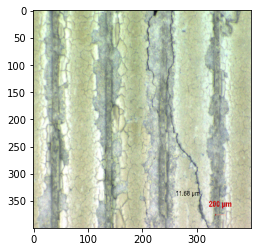

In [6]:
#Plot one of the image and its defect
plt.imshow(X[4])



In [7]:
#image defect
train['Defect'][4]



"['Axial Crack']"

In [8]:
# remove metadata from training file and convert remaining cols to arrays that our images will use as target
y = np.array(train.drop(['Id', 'Defect'],axis=1))


In [9]:
# Shape of output array
y.shape



(151, 6)

In [10]:
#Select 10% as validation set, a standard practice. We can use 20% later to see if it is more effective
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)



In [11]:
# Model Architecture
# Output layer will have 30 neurons equal to the number of identifying metadata hot columns. Use sigmoid as activation. 
# Model can be optimized later by modifying the hypaparameters, e.g. number of hidden layers. 
# Modification can be by heuristic method after all image datasets have been loaded in
# Still keep the same model when we have all training data in? Overfitting?


# Initialize model constructor, sequential is a linear stack of neural network layers
model = Sequential() 
# Add an input layer (optimization can be done here: input shape, etc can be modified)
# Input layer contains 16 hidden unit in this instance
# Each image is 400x400 pixels in RGB (3 channels),
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3))) 
# Covolutional and maxpooling will allow us to efficiently train on image data
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
#Add further layers
# We can try softmax activation later to see if model performs better
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) 
# Max pooling is a sample-based discretization process. Pooling is required to down sample the detection of features in feature maps
#The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned
#Reduce nos of parameters With max pooling,slide a 2x2 filter across the previous layer and take the max of the 4 values in the 2x2 filter
model.add(MaxPooling2D(pool_size=(2, 2))) 
# Add dropout to prevent overfitting
model.add(Dropout(0.25)) 
#RELU (Rectified linear activation unit activation function overcomes the vanishing gradient problem. It is the default activation when developing multilayer Perceptron and convolutional neural networks). Sigmoid (sigmoid()) and hyperbolic tangent (tahn()) activation functions cannot be used in networks with many layers due to the vanishing gradient problem
# Try ELU or SELU (scaled exponential linear unit) activation function later?
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu")) 
# Try average pooling or global max pooling later to reduce computation time? 
#(GlobalMaxPool2D(); AveragePooling2D())
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten()) 
# Add hidden layers
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
# Add hidden layers 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5)) 
# model output layer, correspond to the nos of the hot encoding training column in our image .csv file. Modify this if you need to increase or decrease the nos of training columns
model.add(Dense(6, activation='sigmoid')) 



In [12]:
# Check model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [13]:
# compile and fit the model
# Here, binary_crossentropy is used as the loss function. This is if we consider the multi-label classifier as a combination of multiple independent binary classifiers.  Try categorical_crossentropy later to compare performance
#Binary cross-entropy is for multi-label classifications, whereas categorical cross entropy is for multi-class classification where each example belongs to a single class.
# ADAM is used as the optimizer. Later try Stochastic gradient ('sgd') and RMSProp 
# These can be later modified to check which works best.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model for 10 epochs
# Supply the validation data to examine the model’s performance
# Training loss is ~ 0.54 & its not yet in sync with validation loss which is still ~ 0.61
# Both training and validation accuracy can be improved
# Fit model in batches, batch_size can be modified to evaluate for a better fit
#history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=64,  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=80, mode='min')], shuffle=False)

# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
#                     callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=80, mode='min')], shuffle=False)


Train on 135 samples, validate on 16 samples
Epoch 1/60
135/135 [==============================] - 11s 84ms/step - loss: 1.0767 - accuracy: 0.6617 - val_loss: 0.6717 - val_accuracy: 0.7604
Epoch 2/60
135/135 [==============================] - 11s 85ms/step - loss: 0.6441 - accuracy: 0.6815 - val_loss: 0.6561 - val_accuracy: 0.7708
Epoch 3/60
135/135 [==============================] - 11s 85ms/step - loss: 0.5822 - accuracy: 0.7136 - val_loss: 0.6291 - val_accuracy: 0.7708
Epoch 4/60
135/135 [==============================] - 13s 96ms/step - loss: 0.5828 - accuracy: 0.6938 - val_loss: 0.6623 - val_accuracy: 0.7708
Epoch 5/60
135/135 [==============================] - 11s 85ms/step - loss: 0.5802 - accuracy: 0.6988 - val_loss: 0.6510 - val_accuracy: 0.7708
Epoch 6/60
135/135 [==============================] - 11s 84ms/step - loss: 0.5607 - accuracy: 0.7173 - val_loss: 0.6247 - val_accuracy: 0.7708
Epoch 7/60
135/135 [==============================] - 11s 85ms/step - loss: 0.5730 - accura

135/135 [==============================] - 12s 91ms/step - loss: 0.5121 - accuracy: 0.7481 - val_loss: 0.4731 - val_accuracy: 0.8021
Epoch 58/60
135/135 [==============================] - 12s 92ms/step - loss: 0.4985 - accuracy: 0.7654 - val_loss: 0.4660 - val_accuracy: 0.8021
Epoch 59/60
135/135 [==============================] - 12s 91ms/step - loss: 0.4778 - accuracy: 0.7765 - val_loss: 0.4377 - val_accuracy: 0.8021
Epoch 60/60
135/135 [==============================] - 12s 90ms/step - loss: 0.4677 - accuracy: 0.7741 - val_loss: 0.4074 - val_accuracy: 0.8125


In [15]:
loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

#Generally, if the training data accuracy (“acc”) keeps improving while the validation data accuracy (“val_acc”) gets worse, you are encountering overfitting. It indicates that the model is starting to memorize the data.

# If from the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

# If from the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.
#With val_loss(keras validation loss) and val_acc(keras validation accuracy), many cases can be possible like below:

#val_loss starts increasing, val_acc starts decreasing. This means model is cramming values not learning

#val_loss starts increasing, val_acc also increases.This could be case of overfitting or diverse probability values in cases where softmax is being used in output layer

#val_loss starts decreasing, val_acc starts increasing. This is also fine as that means model built is learning and working fine.

# If the loss on the training set decreases rapidly for the first few epochs. For the test set, the loss does not decrease at the same rate as the training set, but remains almost flat for multiple epochs. This means our model is generalizing well to unseen data.

Test Loss 0.40741679072380066
Test Accuracy 0.8125


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


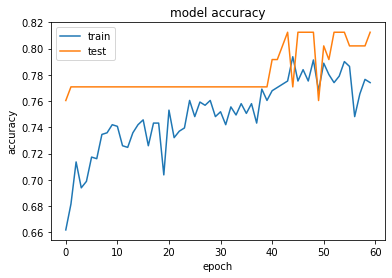

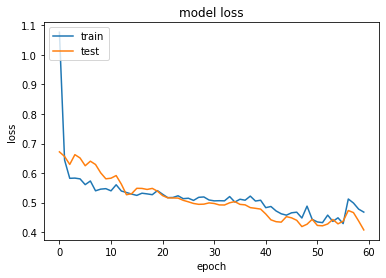

In [16]:
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model

#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Melting Defect (0.387292027)
Skin Crack (0.384326279)


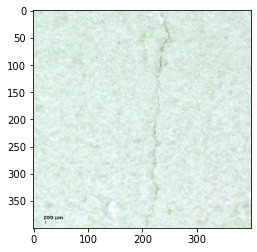

In [17]:
#Use an unseen image to make prediction
#Preprocess Image and make it same size as training image
# Make Top 2 Predictions
# Now predict image metadata. 
# Model will predict the probability for each metadats
img = image.load_img('//SPRC0FIL2001/ptadata$/TestAll/Test Data/crack skin 2 from outlet face ~10µm x3.jpg',target_size=(400,400,3))
img = image.img_to_array(img) 
img = img/255 

classes = np.array(train.columns[2:]) #Will make predictions from col 2 (Axial Crack upwards) 
proba = model.predict(img.reshape(1,400,400,3)) 
#make top n predictions
#np.argsort(probs, axis=1)[-n:]
top_3 = np.argsort(proba[0])[:-7:-1] 
for i in range(2): 
     print("{}".format(classes[top_3[i]])+" ({:.9})".format(proba[0][top_3[i]])) 
plt.imshow(img)


Skin Crack (0.382438)


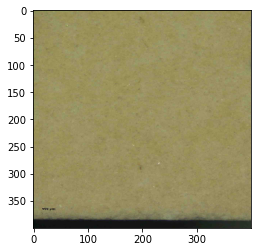

In [18]:
# Make Top 3 Predictions
# Now predict image metadata. 
# Model will predict the probability for each metadats 

#Use an unseen image to make prediction
#Preprocess Image and make it same size as training image
img = image.load_img('//SPRC0FIL2001/ptadata$/TestAll/Test Data/C3_1_skin crack from OF x1 max 10µm.jpg',target_size=(400,400,3))
img = image.img_to_array(img) 
img = img/255

classes = np.array(train.columns[2:]) #Will make predictions from col 2 (Axial Crack upwards) 
proba = model.predict(img.reshape(1,400,400,3)) 
#make top n predictions
#np.argsort(probs, axis=1)[-n:]
top_3 = np.argsort(proba[0])[:-7:-1] 
for i in range(1): 
     print("{}".format(classes[top_3[i]])+" ({:.6})".format(proba[0][top_3[i]])) 
plt.imshow(img)

Melting Defect (0.396137863)
Skin Crack (0.375343204)


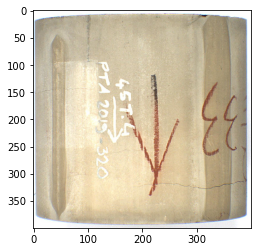

In [19]:
# Make Top 2 Predictions
# Now predict image metadata. 
# Model will predict the probability for each metadats 

#Use an unseen image to make prediction
#Preprocess Image and make it same size as training image
img = image.load_img('//SPRC0FIL2001/ptadata$/TestAll/Test Data/skin radial crack after FE.jpg',target_size=(400,400,3))
img = image.img_to_array(img) 
img = img/255

classes = np.array(train.columns[2:]) #Will make predictions from col 2 (Axial Crack upwards) 
proba = model.predict(img.reshape(1,400,400,3)) 
#make top n predictions
#np.argsort(probs, axis=1)[-n:]
top_3 = np.argsort(proba[0])[:-7:-1] 
for i in range(2): 
     print("{}".format(classes[top_3[i]])+" ({:.9})".format(proba[0][top_3[i]])) 
plt.imshow(img)